In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

## Calculate the alternate allele frequency for each SNP

In [2]:
# Load SNP genotype data
data = pd.read_csv("matrix_1kg.txt", sep = "\t")

In [3]:
# Sum up counts of alternate alleles
alt_alleles = data.drop(["CHROM", "POS", "REF", "ALT"], axis = 1).sum(axis = 1)

# Calculate total number of chromosomes
# Subtracting 4 to exclude the CHROM, POS, REF, and ALT columns
num_chroms = (data.shape[1] - 4) * 2

# Calculate alternate allele frequencies
alt_allele_freqs = alt_alleles / num_chroms

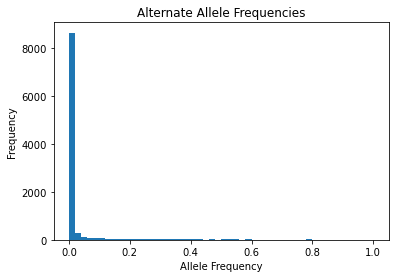

In [4]:
# Plot alternate allele frequencies
fig, ax = plt.subplots()
ax.hist(alt_allele_freqs, bins = 50)

# Add title and axis labels
ax.set_title("Alternate Allele Frequencies")
ax.set_xlabel("Allele Frequency")
ax.set_ylabel("Frequency")

plt.show()

## Subset the data frame to "common variation"

In [5]:
# Subset data frame to just "common variation" (alternate allele frequencies between 0.05 and 0.95)
data["alt_allele_freqs"] = alt_allele_freqs
common_variation_data = data[(data["alt_allele_freqs"] > 0.05) & (data["alt_allele_freqs"] < 0.95)]
common_variation_data

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,alt_allele_freqs
20,chr21,26683267,T,G,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.080259
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,2,0,0,0,1,1,1,0,0.595761
38,chr21,34522570,A,T,0,1,2,1,1,1,...,1,0,1,1,1,1,2,0,1,0.405612
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.094388
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.097527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,1,2,0.841837
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0.115973
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0.180730
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,2,2,2,2,1,2,2,2,2,0.810047


## PCA

In [6]:
# Reformat data for PCA
pca_input = common_variation_data.iloc[:, 4:-1].T

# Standardize data
pca_input_standardized = StandardScaler().fit_transform(pca_input)

# Perform PCA (assuming 10 components)
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"])

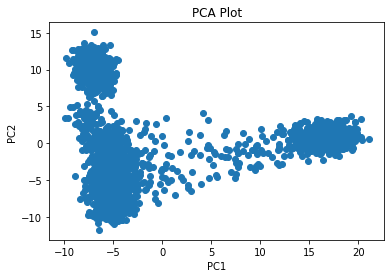

In [7]:
# Plot samples on first and second principal components
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df["PC1"], y = pca_output_df["PC2"])

# Add title and axis labels
ax.set_title("PCA Plot")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.show()

## Advanced Exercises

In [8]:
# Load metadata
metadata = pd.read_csv("integrated_call_samples_v3.20130502.ALL.panel", sep = "\t")
metadata = metadata.iloc[:, :-2]

# Merge metadata and PCA data
pca_output_df["sample"] = pca_input.index
pca_output_df = pd.merge(pca_output_df, metadata, on = "sample")

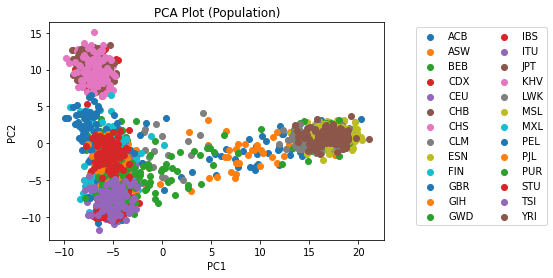

In [9]:
# Color PCA plot according to population
fig, ax = plt.subplots()
population = pca_output_df.groupby("pop")
for name, group in population:
    ax.scatter(x = group["PC1"], y = group["PC2"], label = name)
    
# Add title and axis labels
ax.set_title("PCA Plot (Population)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Add legend
plt.legend(bbox_to_anchor = (1.5, 1), loc = "upper right", ncol = 2)

plt.show()

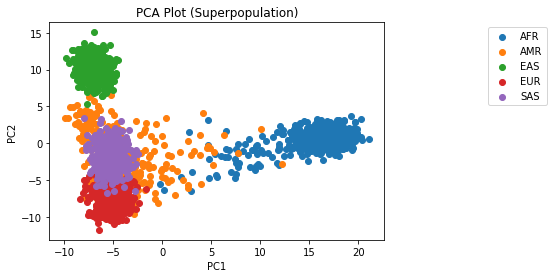

In [10]:
# Color PCA plot according to superpopulation
fig, ax = plt.subplots()
super_population = pca_output_df.groupby("super_pop")
for name, group in super_population:
    ax.scatter(x = group["PC1"], y = group["PC2"], label = name)
    
# Add title and axis labels
ax.set_title("PCA Plot (Superpopulation)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
    
# Add legend
plt.legend(bbox_to_anchor = (1.5, 1), loc = "upper right")

plt.show()

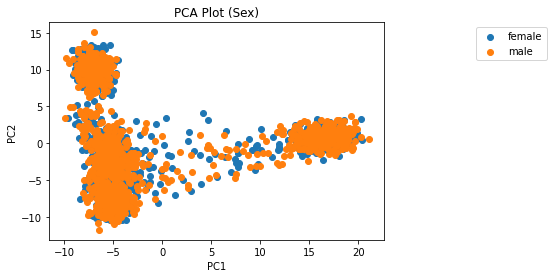

In [11]:
# Color PCA plot according to sex
fig, ax = plt.subplots()
gender = pca_output_df.groupby("gender")
for name, group in gender:
    ax.scatter(x = group["PC1"], y = group["PC2"], label = name)

# Add title and axis labels
ax.set_title("PCA Plot (Sex)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Add legend
plt.legend(bbox_to_anchor = (1.5, 1), loc = "upper right")

plt.show()

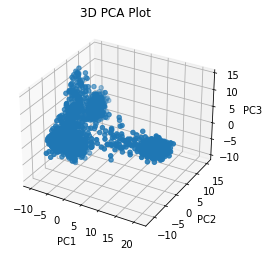

In [12]:
# Plot the first three principal components together on a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

ax.scatter(xs = pca_output_df["PC1"], ys = pca_output_df["PC2"], zs = pca_output_df["PC3"])

# Add title and axis labels
ax.set_title("3D PCA Plot")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()